The main preprocessing should be done to make the distribution of the dataset non-skewed!
Preprocessing steps:
- log-transform the target feature
- box cox transform the input feature

In [23]:
# importing some dependencies
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')


from scipy import stats
from scipy.stats import norm, skew

In [24]:
# importing the dataset
df = pd.read_csv("./Data/data.csv",sep=",")
df.drop(['Unnamed: 0'], axis=1, inplace=True) # There were some formatting issues while
                                              # writing the csv

Lets check the distribution of the target variable **WATER_LEVEL** more closely


 mu = 6.81 and sigma = 0.97



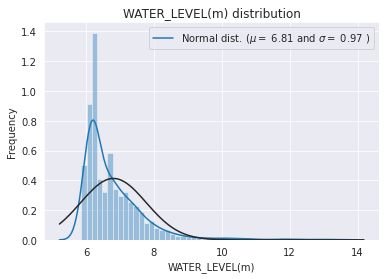

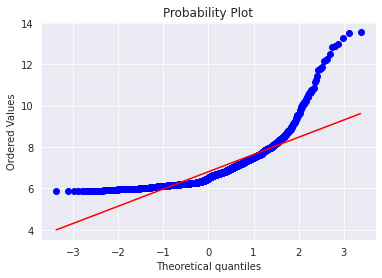

In [25]:
sns.distplot(df['WATER_LEVEL(m)'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['WATER_LEVEL(m)'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('WATER_LEVEL(m) distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['WATER_LEVEL(m)'], plot=plt)
plt.show()


#### Log transformation of the target


 mu = 2.05 and sigma = 0.11



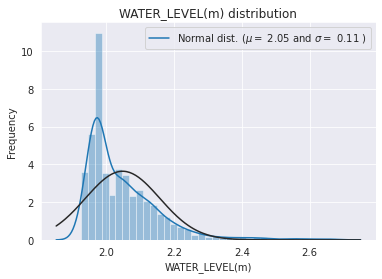

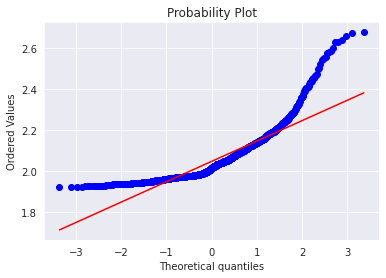

In [26]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["WATER_LEVEL(m)"] = np.log1p(df["WATER_LEVEL(m)"])

#Check the new distribution 
sns.distplot(df['WATER_LEVEL(m)'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['WATER_LEVEL(m)'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('WATER_LEVEL(m) distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['WATER_LEVEL(m)'], plot=plt)
plt.show()

#### BOX COX transformation of the input feature